
# Introduction to Python

Interactive code to introduce and illustrate basic mathematics operations using Python libraries, for undergraduate mathematics course MAT301 at Abertay University (JT 2022).

### General introduction

This notebook lists examples of simple Python commands and programs that can be used to help with the understanding of MAT301 content, particularly in the area of numerical algorithms. Students can use Python to check their answers and visually see the mathematics in action. More broadly, a wide knowledge and ability to use other programming languages may help with problem solving and employability. 

This is a Jupyter notebook launched from within the Anaconda data science platform. Anaconda can be downloaded here:

[https://www.anaconda.com](https://www.anaconda.com)

Python is an open-source programming language used extensively around the world. It is also vital for carrying out Scientific Computation.

To execute commands in Jupyter, either Run the cell or hit SHIFT + ENTER.

Alternatively, you can perform cloud computing using Google Colab:

[https://colab.research.google.com/](https://colab.research.google.com/)

You will need a Google account to perform cloud computing, but the commands are (largely) the same. One can also click the "play" button next to an executable segment of code to run that code.

Notebooks in Jupyter look like this: ![Jupyter screenshot](https://github.com/jwt104/MAT201DynamicsWithPythonBook/blob/main/JupyterNotebook_my_first_plot.png?raw=1)

Note that they comprise of markdown cells and code cells. This text is a markdown cell. Below, you can see my first code cell, containing the classic first command:

In [ ]:
print("Hello, World")

Hello, World


The output should always appear below each code cell (if there is any).

Note if you hit ENTER without the shift, the notebook will either open the cell for editing, or perform a carriage return within that cell instead. You can edit code or text, then run it with SHIFT + ENTER.

Try modifying this statement yourself: **Python is ....**

I encourage you to make copies of notebooks (to augment your lecture notes) and save them to your own computer or OneDrive areas. 

Python has extended functionality through libraries containing lots of extra commands, functions, and useful stuff. We import these libraries and commands using the *import* command:

In [ ]:
import time
time.sleep(3)

In this case, we have run a command which takes 3 seconds to execute and produces no output. Note that when the code is running the symbol within the square brackets changes (indicating it is running).
 

There are **many** detailed introductions to Jupyter notebooks, and Google colab, including textbooks, online workshops, videos, notebooks, theatrical productions (well maybe)... most are available on the web, like
[this one](https://www.dataquest.io/blog/jupyter-notebook-tutorial/). Youtube videos [like this one](https://youtu.be/RLYoEyIHL6A) also allow you to see this process as you would on your machine.



---



## Symbolic Computation

One element of Python that is particularly useful to mathematicians is its ability to use symbolic computation to solve mathematical tasks, for example in algebra or calculus. This section will illustrate basic use of a Python library called [Sympy](https://www.sympy.org/en/index.html). Like other Python packages, it is well documented, and widely used.

Let's go ahead and load in the libraries we need: in this case, we'll focus solely on *sympy* (and when we import it, we'll shorten its name to make things easier every time we use one of it's commands):

In [ ]:
import sympy as sym

Let's very briefly look at some capabilities of *sympy*. *Sympy* has three data types, Real Integer and Rational. Rational numbers are probably better known as fractions. If we wanted to work with the fraction of one half, for example, we could write this as a real number $0.5$, or as a fraction:

In [ ]:
onehalf = sym.Rational(1,2)
print(onehalf)

1/2


We can perform basic maths with symbols in the usual way (e.g. addition, subtraction, multiplication, division):

In [ ]:
print("4*onehalf=", 4 * onehalf)

4*onehalf= 2


We can use symbolic constants like $pi$, $e$ (as in the exponential) or indeed infinity:

In [ ]:
mypi = sym.pi
print(mypi.evalf())

3.14159265358979


This is just for starters: we can build systems of equations if we tell Python that some symbols represent unknown numbers:

In [ ]:
x, y = sym.Symbol('x'), sym.Symbol('y')
print(x + 2 * x + onehalf)

3*x + 1/2


See how Python has simplified the above expression, and added together the x terms? We can get it to do more complicated algebra:

In [ ]:
sym.expand( (x + onehalf * y)**2 )

x**2 + x*y + y**2/4

Sympy has expanded this binomial, just like we would using pen and paper. It knows all the rules we do! It also knows lots about trigonometric functions. The *simplify* command can simplify expressions, using all of the maths knowledge in the library. We know that $\cos^2{(x)}+\sin^2{(x)}=1$; so does sympy:

In [ ]:
print( sym.cos(x) * sym.cos(x) + sym.sin(x) * sym.sin(x))
print( sym.simplify( sym.cos(x) * sym.cos(x) + sym.sin(x) * sym.sin(x)) )

sin(x)**2 + cos(x)**2
1


It can even perform calculus operations like differentiation and integration:

In [ ]:
sym.diff(onehalf * x ** 2, x)

x

where the command has differentiated the first expression with respect to x. We can perform partial derivatives just as easily: lets say we need \begin{equation} 
\frac{\partial}{\partial x} \left(x^3+y+axy\right), 
\end{equation}
where $x$ and $y$ are independent variables:

In [ ]:
sym.diff(x ** 3 + y + onehalf * x * y , x)

3*x**2 + y/2

easy peasy! What about integration? We know that (ignoring the constants of integration for now) 
\begin{equation}\int \frac{1}{{x}} ~{\rm{d}}x=\ln{|x|}+c,\end{equation} but so does sympy:

In [ ]:
sym.integrate(1 / x, x)

log(x)

(also noting that sympy refers to natural log ($ln$) as "log"). Sympy can also solve equations or sets of equations in one line:

In [ ]:
solution = sym.solve((x + 5 * y - 2, -3 * x + 6 * y - 15), (x, y))
solution[x], solution[y]

(-3, 1)

It can also solve matrix equations and tons of other clever things. For this lecture course, and particularly its application to numerical techniques, this is largely unecessary, but demonstrates some of the powerful tools Python can bring to bear.

## Plotting

A final tool that is really useful for us is visualisation, i.e. plotting. Numbers printed on the page sometimes mean little until we compare them with the true solution.

To plot figures, we need to load in some extra libraries. *numpy* and *math* are also useful for intrinsic maths concepts (as their name suggests). *matplotlib* again is a complex library that goes far beyond our needs for now. We'll simply import the basic plotting command *pyplot* from this library:

In [ ]:
import numpy as np
import math 
import matplotlib.pyplot as plt 

Now we need to create some example data. Lets use the graph of $\sin^2(x)$. To do this we have to set up an array of numbers as our independent variable, $x$. For arguments sake, we'll choose $1000$ values in the range between $0$ and $10\pi$.

In [ ]:
x = np.linspace(0, 10 * np.pi, 10 ** 3)
y = np.sin(x) * np.sin(x)

Now we create our plot. Python can plot data already stored in variables, or calculate the data on the fly. Lets create a plot below illustrating what happens when we add $\sin^2(x)$ and $\cos^2(x)$ together, with labelled axis and even a quick legend:

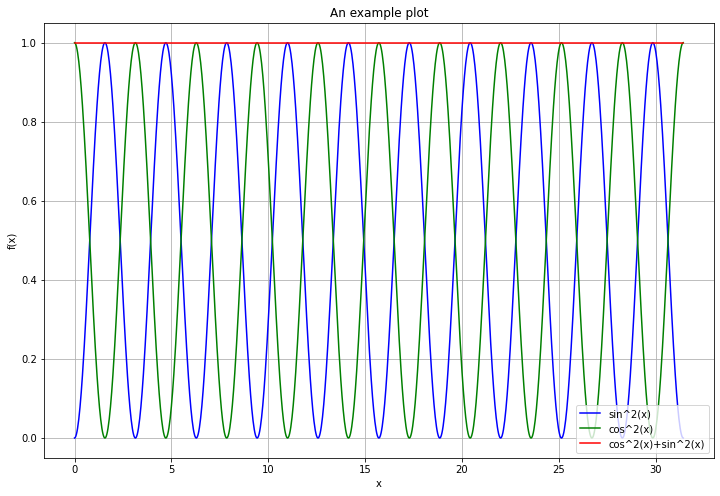

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'b', label='sin^2(x)')
plt.plot(x, np.cos(x) * np.cos(x), 'g', label='cos^2(x)')
plt.plot(x, y + np.cos(x) * np.cos(x), 'r', label='cos^2(x)+sin^2(x)')
plt.title('An example plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Some of these simple tools will be useful in later workbooks. Remember, Python is incredibly well documented online, so if you encounter a problem with a command or library, try a targeted online search (or ask me for help)!